In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


The Dataset : https://github.com/zalandoresearch/fashion-mnist

In [8]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(np.isnan(train_images).sum())


print(np.isnan(test_images).sum())

0
0


In [9]:
# Reduce to 5 classes (0-4)
mask_train = train_labels < 5
mask_test = test_labels < 5

train_images = train_images[mask_train]
train_labels = train_labels[mask_train]
test_images = test_images[mask_test]
test_labels = test_labels[mask_test]

In [10]:
# Class names for 5 categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat']

In [11]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

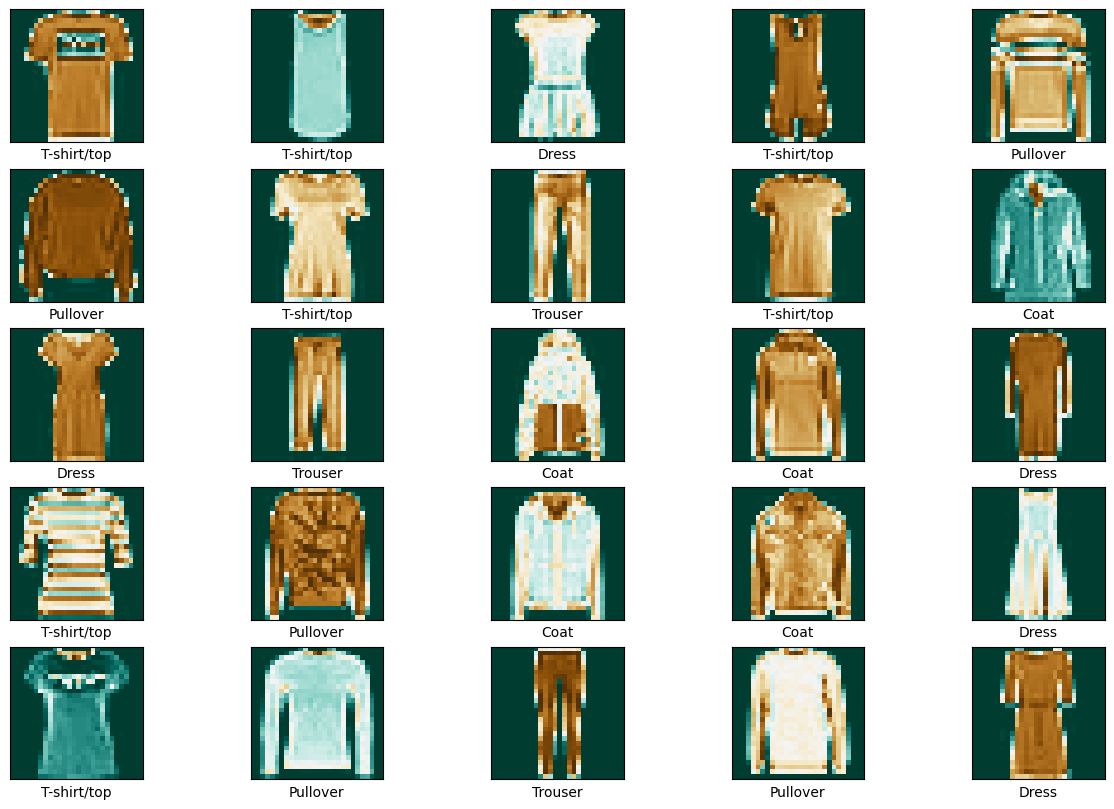

In [24]:
# Display sample images
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='BrBG_r')#Accent ,Accent_r,Blues,Blues_r, BuGn,BuGn_r,BuPu,BuPu_r,Cool,Cool_r,Dark2,Dark2_r, GnBu,GnBu_r,Greens,Greens_r,Greys,Greys_r,OrRd,OrRd_r,Oranges,Oranges_r,PuBu,PuBu_r,PuRd,PuRd_r,RdPu,RdPu_r,Reds,Reds_r,YlGn,YlGn_r,YlGnBu,YlGnBu_r,YlOrBr,YlOrBr_r,YlOrRd,YlOrRd_r
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
# Flatten images (28x28 -> 784 features)
X_train_flat = train_images.reshape(train_images.shape[0], -1)  # Shape: (n_samples, 784)
X_test_flat = test_images.reshape(test_images.shape[0], -1)     # Shape: (n_samples, 784)



In [26]:
print(f"Training data shape: {X_train_flat.shape}")
print(f"Testing data shape: {X_test_flat.shape}")

Training data shape: (30000, 784)
Testing data shape: (5000, 784)


In [29]:
# Standardize features (important for Logistic Regression)
print("\nStandardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


Standardizing features...


In [31]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
# 'multinomial' for multi-class classification, 'lbfgs' is a good solver for this
log_reg = LogisticRegression(
    multi_class='multinomial',  # For multi-class classification
    solver='lbfgs',             # Good for small to medium datasets
    max_iter=1000,              # Maximum iterations
    random_state=42,
    verbose=1                   # Show training progress
)


Training Logistic Regression model...


In [33]:
# Train the model
log_reg.fit(X_train_scaled, train_labels)
print("\nLogistic Regression training completed!")


C:\Users\mw618\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression training completed!


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.5s finished


In [ ]:
# Make predictions
test_predictions = log_reg.predict(X_test_scaled)

In [38]:
# Get prediction probabilities
train_probabilities = log_reg.predict_proba(X_train_scaled)
test_probabilities = log_reg.predict_proba(X_test_scaled)


In [41]:
# Calculate accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Testing Accuracy (Logistic Regression): {test_accuracy:.4f}")


Testing Accuracy (Logistic Regression): 0.8594


In [42]:
# Number of classes
n_classes = len(class_names)

# Binarize test labels (One-vs-Rest)
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4])


In [43]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i],
                                  test_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

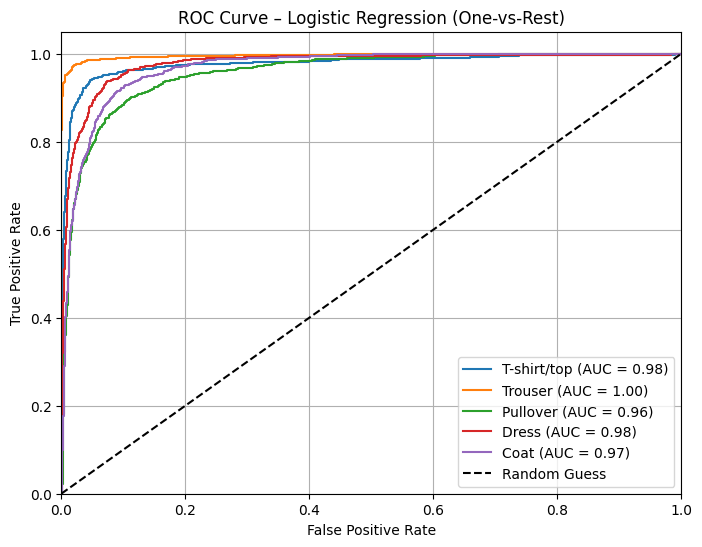

In [44]:
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [45]:
print("\nROC-AUC Scores (One-vs-Rest):")
for i in range(n_classes):
    print(f"{class_names[i]}: AUC = {roc_auc[i]:.4f}")

# Macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))
print(f"\nMacro-average AUC: {macro_auc:.4f}")


ROC-AUC Scores (One-vs-Rest):
T-shirt/top: AUC = 0.9772
Trouser: AUC = 0.9958
Pullover: AUC = 0.9563
Dress: AUC = 0.9764
Coat: AUC = 0.9668

Macro-average AUC: 0.9745



Confusion Matrix for Test Data:


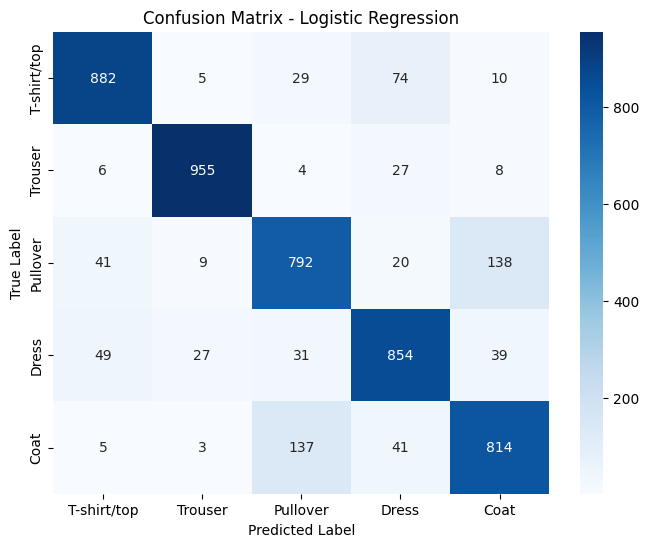


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.88      0.89      1000
     Trouser       0.96      0.95      0.96      1000
    Pullover       0.80      0.79      0.79      1000
       Dress       0.84      0.85      0.85      1000
        Coat       0.81      0.81      0.81      1000

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [46]:
# Confusion Matrix
print("\nConfusion Matrix for Test Data:")
conf_matrix = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions, target_names=class_names))